# Telecom Churn Case Study

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.preprocessing import PolynomialFeatures,MinMaxScaler
 
import os

#hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the dataset
data = pd.read_csv("churn_data.csv")

##  Data understanding

In [3]:
# size of the dataset
data.shape

(99999, 226)

In [4]:
# summary of the dataset:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [5]:
# head
data.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6  ...  sachet_3g_9  fb_user_6  fb_user_7  \
0            9/30/2014  197.385  ...            0        1.0        1.0   
1            9/30/2014   34.047  ...            0        NaN        1.0   
2            9/30/2014  167.690  ...            0        NaN        NaN   
3            9/30/2014  221.338  ...            0        NaN        NaN   
4            9/30/2014  261.636  ...            0        0.0        NaN   

   fb_user_8  fb_user_9   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  
0        1.0        NaN   968        30.4         0.0      101.20        3.58  
1        1.0        NaN  1006         0.0         0.0        0.00        0.00  
2        NaN        1.0  1103         0.0         0.0        4.17        0.00  
3        NaN        NaN  2491         0.0         0.0        0.00        0.00  
4        NaN        NaN  1526         0.0         0.0        0.00        0.00  

[5 rows x 226 columns]

## Data Preparation

In [6]:
#find the percentage of missing data columnwise
((data.isnull().sum() * 100 / len(data)).sort_values(ascending=False)).head(50)

count_rech_2g_6             74.846748
date_of_last_rech_data_6    74.846748
count_rech_3g_6             74.846748
av_rech_amt_data_6          74.846748
max_rech_data_6             74.846748
total_rech_data_6           74.846748
arpu_3g_6                   74.846748
arpu_2g_6                   74.846748
night_pck_user_6            74.846748
fb_user_6                   74.846748
arpu_3g_7                   74.428744
count_rech_2g_7             74.428744
fb_user_7                   74.428744
count_rech_3g_7             74.428744
arpu_2g_7                   74.428744
av_rech_amt_data_7          74.428744
max_rech_data_7             74.428744
night_pck_user_7            74.428744
total_rech_data_7           74.428744
date_of_last_rech_data_7    74.428744
night_pck_user_9            74.077741
date_of_last_rech_data_9    74.077741
fb_user_9                   74.077741
arpu_2g_9                   74.077741
max_rech_data_9             74.077741
arpu_3g_9                   74.077741
total_rech_d

In [7]:
#Delete columns having all values as same
nunique = data.apply(pd.Series.nunique)
cols_to_drop = nunique[nunique == 1].index
data = data.drop(cols_to_drop, axis=1)

In [8]:
data.shape

(99999, 210)

In [9]:
# Drop variables with more than 70% threshold of missing values
#per=(data.isnull().sum() * 100 / len(data))
#missing_columns = per[per > 70].index
#data.drop(missing_columns, axis=1, inplace=True)
#missing_columns

In [10]:
#extracting integer,float and Date column names seperately
int_col=data.select_dtypes(include='int64')
float_col=data.select_dtypes(include='float64')
date_col=data.select_dtypes(include='object')

In [11]:
int_columns = list(int_col.columns)
float_columns = list(float_col.columns)
date_columns = list(date_col.columns)

In [12]:
int_columns

['mobile_number',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_num_9',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'total_rech_amt_9',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'max_rech_amt_9',
 'last_day_rch_amt_6',
 'last_day_rch_amt_7',
 'last_day_rch_amt_8',
 'last_day_rch_amt_9',
 'monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'monthly_2g_9',
 'sachet_2g_6',
 'sachet_2g_7',
 'sachet_2g_8',
 'sachet_2g_9',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8',
 'monthly_3g_9',
 'sachet_3g_6',
 'sachet_3g_7',
 'sachet_3g_8',
 'sachet_3g_9',
 'aon']

In [13]:
#find the percentage of missing data for integer columns
((data[int_columns].isnull().sum() * 100 / len(data[int_columns])).sort_values(ascending=False)).head(50)

aon                   0.0
total_rech_amt_9      0.0
last_day_rch_amt_7    0.0
last_day_rch_amt_6    0.0
max_rech_amt_9        0.0
max_rech_amt_8        0.0
max_rech_amt_7        0.0
max_rech_amt_6        0.0
total_rech_amt_8      0.0
sachet_3g_9           0.0
total_rech_amt_7      0.0
total_rech_amt_6      0.0
total_rech_num_9      0.0
total_rech_num_8      0.0
total_rech_num_7      0.0
total_rech_num_6      0.0
last_day_rch_amt_8    0.0
last_day_rch_amt_9    0.0
monthly_2g_6          0.0
monthly_2g_7          0.0
monthly_2g_8          0.0
monthly_2g_9          0.0
sachet_2g_6           0.0
sachet_2g_7           0.0
sachet_2g_8           0.0
sachet_2g_9           0.0
monthly_3g_6          0.0
monthly_3g_7          0.0
monthly_3g_8          0.0
monthly_3g_9          0.0
sachet_3g_6           0.0
sachet_3g_7           0.0
sachet_3g_8           0.0
mobile_number         0.0
dtype: float64

In [14]:
len(float_columns)

168

In [15]:
float_columns

['arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2f_mou_9',
 'std_og_mou_6',
 'std_o

In [16]:
#find the percentage of missing data for float columns
((data[float_columns].isnull().sum() * 100 / len(data[float_columns])).sort_values(ascending=False)).head(50)

count_rech_2g_6       74.846748
fb_user_6             74.846748
arpu_3g_6             74.846748
max_rech_data_6       74.846748
arpu_2g_6             74.846748
av_rech_amt_data_6    74.846748
night_pck_user_6      74.846748
count_rech_3g_6       74.846748
total_rech_data_6     74.846748
fb_user_7             74.428744
count_rech_3g_7       74.428744
night_pck_user_7      74.428744
total_rech_data_7     74.428744
av_rech_amt_data_7    74.428744
arpu_2g_7             74.428744
max_rech_data_7       74.428744
arpu_3g_7             74.428744
count_rech_2g_7       74.428744
count_rech_3g_9       74.077741
av_rech_amt_data_9    74.077741
count_rech_2g_9       74.077741
total_rech_data_9     74.077741
max_rech_data_9       74.077741
night_pck_user_9      74.077741
arpu_3g_9             74.077741
fb_user_9             74.077741
arpu_2g_9             74.077741
total_rech_data_8     73.660737
count_rech_2g_8       73.660737
fb_user_8             73.660737
count_rech_3g_8       73.660737
night_pc

In [17]:
# float variables with missing values
per1=(data[float_columns].isnull().sum() * 100 / len(data[float_columns]))
float_missing_columns = per1[per1 > 0].index
float_missing_columns.all

<bound method Index._add_logical_methods.<locals>._make_logical_function.<locals>.logical_func of Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9',
       'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9',
       'roam_ic_mou_6', 'roam_ic_mou_7',
       ...
       'arpu_2g_8', 'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7',
       'night_pck_user_8', 'night_pck_user_9', 'fb_user_6', 'fb_user_7',
       'fb_user_8', 'fb_user_9'],
      dtype='object', length=144)>

In [18]:
data[float_missing_columns].describe(include='all')

onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       ...     arpu_2g_8     arpu_2g_9  night_pck_user_6  night_pck_user_7  \
count  ...  26339.000000  25922.000000      25153.000000      25571.000000   
mean   ...     86.599478     93.712026          0.025086          0.023034   
std    ...    168.247852    171.384224          0.156391          0.150014   
min    ...    -55.830000    -45.740000          0.000000          0.000000   
25%    ...      0.000000      0.000000          0.000000          0.000000   
50%    ...      9.270000     14.800000          0.000000          0.000000   
75%    ...    122.070000    140.010000          0.000000          0.000000   
max    ...   3483.170000   3467.170000          1.000000          1.000000   

       night_pck_user_8  night_pck_user_9     fb_user_6     fb_user_7  \
count      26339.000000      25922.000000  25153.000000  25571.000000   
mean           0.020844          0.015971      0.914404      0.908764   
std            0.142863          0.125366      0.279772      0.287950   
min            0.000000          0.000000      0.000000      0.000000   
25%            0.000000          0.000000      1.000000      1.000000   
50%            0.000000          0.000000      1.000000      1.000000   
75%            0.000000          0.000000      1.000000      1.000000   
max            1.000000          1.000000      1.000000      1.000000   

          fb_user_8     fb_user_9  
count  26339.000000  25922.000000  
mean       0.890808      0.860968  
std        0.311885      0.345987  
min        0.000000      0.000000  
25%        1.000000      1.000000  
50%        1.000000      1.000000  
75%        1.000000      1.000000  
max        1.000000      1.000000  

[8 rows x 144 columns]

In [19]:
data[float_missing_columns]=data[float_missing_columns].fillna(0)

In [20]:
#find the percentage of missing data for float columns
((data[float_columns].isnull().sum() * 100 / len(data[float_columns])).sort_values(ascending=False)).head(50)

sep_vbc_3g          0.0
std_og_mou_6        0.0
spl_og_mou_6        0.0
isd_og_mou_9        0.0
isd_og_mou_8        0.0
isd_og_mou_7        0.0
isd_og_mou_6        0.0
std_og_mou_9        0.0
std_og_mou_8        0.0
std_og_mou_7        0.0
std_og_t2f_mou_9    0.0
jun_vbc_3g          0.0
std_og_t2f_mou_8    0.0
std_og_t2f_mou_7    0.0
std_og_t2f_mou_6    0.0
std_og_t2m_mou_9    0.0
std_og_t2m_mou_8    0.0
std_og_t2m_mou_7    0.0
std_og_t2m_mou_6    0.0
std_og_t2t_mou_9    0.0
spl_og_mou_7        0.0
spl_og_mou_8        0.0
spl_og_mou_9        0.0
og_others_6         0.0
loc_ic_t2f_mou_7    0.0
loc_ic_t2f_mou_6    0.0
loc_ic_t2m_mou_9    0.0
loc_ic_t2m_mou_8    0.0
loc_ic_t2m_mou_7    0.0
loc_ic_t2m_mou_6    0.0
loc_ic_t2t_mou_9    0.0
loc_ic_t2t_mou_8    0.0
loc_ic_t2t_mou_7    0.0
loc_ic_t2t_mou_6    0.0
total_og_mou_9      0.0
total_og_mou_8      0.0
total_og_mou_7      0.0
total_og_mou_6      0.0
og_others_9         0.0
og_others_8         0.0
og_others_7         0.0
std_og_t2t_mou_8

In [21]:
#find the percentage of missing data 
((data.isnull().sum() * 100 / len(data)).sort_values(ascending=False)).head(30)

date_of_last_rech_data_6    74.846748
date_of_last_rech_data_7    74.428744
date_of_last_rech_data_9    74.077741
date_of_last_rech_data_8    73.660737
date_of_last_rech_9          4.760048
date_of_last_rech_8          3.622036
date_of_last_rech_7          1.767018
date_of_last_rech_6          1.607016
og_others_6                  0.000000
total_og_mou_8               0.000000
total_og_mou_7               0.000000
total_og_mou_6               0.000000
og_others_9                  0.000000
og_others_8                  0.000000
og_others_7                  0.000000
sep_vbc_3g                   0.000000
spl_og_mou_9                 0.000000
std_og_mou_7                 0.000000
spl_og_mou_8                 0.000000
spl_og_mou_7                 0.000000
spl_og_mou_6                 0.000000
isd_og_mou_9                 0.000000
isd_og_mou_8                 0.000000
isd_og_mou_7                 0.000000
isd_og_mou_6                 0.000000
std_og_mou_9                 0.000000
total_og_mou

In [22]:
# converting date variable from object to Date format 
data['date_of_last_rech_9'] = pd.to_datetime(data['date_of_last_rech_9'])
data['date_of_last_rech_8'] = pd.to_datetime(data['date_of_last_rech_8'])
data['date_of_last_rech_7'] = pd.to_datetime(data['date_of_last_rech_7'])
data['date_of_last_rech_6'] = pd.to_datetime(data['date_of_last_rech_6'])

In [23]:
data = data.drop(['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9'],axis=1)

In [24]:
#find the percentage of missing data 
((data.isnull().sum() * 100 / len(data)).sort_values(ascending=False)).head(10)

date_of_last_rech_9    4.760048
date_of_last_rech_8    3.622036
date_of_last_rech_7    1.767018
date_of_last_rech_6    1.607016
sep_vbc_3g             0.000000
std_og_t2f_mou_9       0.000000
total_og_mou_9         0.000000
total_og_mou_8         0.000000
total_og_mou_7         0.000000
total_og_mou_6         0.000000
dtype: float64

In [25]:
# droping mobile number feature
data = data.drop('mobile_number',axis=1)

In [26]:
data.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 205 columns):
 #   Column               Dtype         
---  ------               -----         
 0   arpu_6               float64       
 1   arpu_7               float64       
 2   arpu_8               float64       
 3   arpu_9               float64       
 4   onnet_mou_6          float64       
 5   onnet_mou_7          float64       
 6   onnet_mou_8          float64       
 7   onnet_mou_9          float64       
 8   offnet_mou_6         float64       
 9   offnet_mou_7         float64       
 10  offnet_mou_8         float64       
 11  offnet_mou_9         float64       
 12  roam_ic_mou_6        float64       
 13  roam_ic_mou_7        float64       
 14  roam_ic_mou_8        float64       
 15  roam_ic_mou_9        float64       
 16  roam_og_mou_6        float64       
 17  roam_og_mou_7        float64       
 18  roam_og_mou_8        float64       
 19  roam_og_mou_9        flo

In [27]:
data.date_of_last_rech_9

0       2014-09-28
1       2014-09-30
2       2014-09-29
3       2014-09-30
4       2014-09-28
           ...    
99994   2014-09-25
99995   2014-09-26
99996   2014-09-02
99997   2014-09-17
99998          NaT
Name: date_of_last_rech_9, Length: 99999, dtype: datetime64[ns]

## Filter high-value customers

In [28]:
# calculate the total data recharge amount for June and July = number of recharges * average recharge amount
data['total_data_rech_amt_6'] = data.total_rech_data_6 * data.av_rech_amt_data_6
data['total_data_rech_amt_7'] = data.total_rech_data_7 * data.av_rech_amt_data_7

In [29]:
# calculate total recharge amount and average for June and July 
data['amt_data_6'] = data.total_rech_amt_6 + data.total_data_rech_amt_6
data['amt_data_7'] = data.total_rech_amt_7 + data.total_data_rech_amt_7
data['avg_rech_amt_6_7'] = (data.amt_data_6 + data.amt_data_7)/2

In [30]:

data.avg_rech_amt_6_7.quantile(0.7)

478.0

In [31]:
# retain only those customers who have recharged with more than or equal to 70th percentile amount
data = data.loc[data.avg_rech_amt_6_7 >= data.avg_rech_amt_6_7.quantile(0.7), :]
data = data.reset_index(drop=True)
data.shape

(30001, 210)

In [32]:
# delete variables created to filter high-value customers
data = data.drop(['total_data_rech_amt_6', 'total_data_rech_amt_7',
                                      'amt_data_6', 'amt_data_7', 'avg_rech_amt_6_7'], axis=1)
data.shape

(30001, 205)

## Derive the churn variable

In [33]:
# calculate total incoming and outgoing minutes of usage
data['total_calls_mou_9'] = data.total_ic_mou_9 + data.total_og_mou_9

In [34]:
# calculate 2g and 3g data consumption
data['total_internet_mb_9'] =  data.vol_2g_mb_9 + data.vol_3g_mb_9

In [35]:
# create churn variable
# 0 - not churn, 1 - churn
data['churn'] = data.apply(lambda x: 1 if (x.total_calls_mou_9 == 0 and x.total_internet_mb_9 == 0) else 0, axis=1)

In [36]:
data.churn

0        1
1        1
2        0
3        0
4        0
        ..
29996    0
29997    0
29998    0
29999    0
30000    0
Name: churn, Length: 30001, dtype: int64

In [37]:
# delete derived variables
data = data.drop(['total_calls_mou_9', 'total_internet_mb_9'], axis=1)

In [38]:
data.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 206 columns):
 #   Column               Dtype         
---  ------               -----         
 0   arpu_6               float64       
 1   arpu_7               float64       
 2   arpu_8               float64       
 3   arpu_9               float64       
 4   onnet_mou_6          float64       
 5   onnet_mou_7          float64       
 6   onnet_mou_8          float64       
 7   onnet_mou_9          float64       
 8   offnet_mou_6         float64       
 9   offnet_mou_7         float64       
 10  offnet_mou_8         float64       
 11  offnet_mou_9         float64       
 12  roam_ic_mou_6        float64       
 13  roam_ic_mou_7        float64       
 14  roam_ic_mou_8        float64       
 15  roam_ic_mou_9        float64       
 16  roam_og_mou_6        float64       
 17  roam_og_mou_7        float64       
 18  roam_og_mou_8        float64       
 19  roam_og_mou_9        flo

In [39]:
# print churn ratio
print("Churn Ratio:")
print((data.churn.value_counts()/len(data))*100)

Churn Ratio:
0    91.863605
1     8.136395
Name: churn, dtype: float64


In [40]:
# Create correlation matrix
corr_matrix = data.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]


In [41]:
to_drop

['total_rech_amt_8',
 'total_rech_amt_9',
 'sachet_2g_6',
 'sachet_2g_7',
 'sachet_2g_8',
 'sachet_2g_9']

In [42]:
# Drop features 
data.drop(['total_rech_amt_9','sachet_2g_6','sachet_2g_9'], axis=1, inplace=True)

In [43]:
data.shape

(30001, 203)

## Derive new features

In [44]:
# Lets derive some features that could be important indicators of churn.
# The first two months 6 and 7 are the ‘good’ phase.so calculate the averegae of both the months for some important features
data['avg_arpu_6_7'] = (data.arpu_6+data.arpu_7)/2
data['avg_roam_ic_mou_6_7'] = (data.roam_ic_mou_6+data.roam_ic_mou_7)/2
data['avg_roam_og_mou_6_7'] = (data.roam_og_mou_6+data.roam_og_mou_7)/2
data['avg_loc_og_mou_6_7'] = (data.loc_og_mou_6+data.loc_og_mou_7)/2
data['avg_std_og_mou_6_7'] = (data.std_og_mou_6+data.std_og_mou_7)/2
data['avg_isd_og_mou_6_7'] = (data.isd_og_mou_6+data.isd_og_mou_7)/2
data['avg_total_og_mou_6_7'] = (data.total_og_mou_6+data.total_og_mou_7)/2
data['avg_loc_ic_mou_6_7'] = (data.loc_ic_mou_6+data.loc_ic_mou_7)/2
data['avg_std_ic_mou_6_7'] = (data.std_ic_mou_6+data.std_ic_mou_7)/2
data['avg_total_ic_mou_6_7'] = (data.total_ic_mou_6+data.total_ic_mou_7)/2
data['avg_total_rech_num_6_7'] = (data.total_rech_num_6+data.total_rech_num_7)/2
data['avg_total_rech_amt_6_7'] = (data.total_rech_amt_6+data.total_rech_amt_7)/2
data['avg_total_rech_data_6_7'] = (data.total_rech_data_6+data.total_rech_data_7)/2
data['avg_vol_2g_mb_6_7'] = (data.vol_2g_mb_6+data.vol_2g_mb_7)/2
data['avg_vol_3g_mb_6_7'] = (data.vol_3g_mb_6+data.vol_3g_mb_7)/2

In [45]:
# delete the june and july columns
data = data.drop(['arpu_6','arpu_7','roam_ic_mou_6','roam_ic_mou_7','roam_og_mou_6','roam_og_mou_7','loc_og_mou_6','loc_og_mou_7','std_og_mou_6','std_og_mou_7','isd_og_mou_6','isd_og_mou_7','total_og_mou_6','total_og_mou_7','loc_ic_mou_6','loc_ic_mou_7','std_ic_mou_6','std_ic_mou_7','total_ic_mou_6','total_ic_mou_7','total_rech_num_6','total_rech_num_7','total_rech_amt_6','total_rech_amt_7','total_rech_data_6','total_rech_data_7','vol_2g_mb_6','vol_2g_mb_7','vol_3g_mb_6','vol_3g_mb_7','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8'],axis=1)

In [46]:
data.shape

(30001, 185)

#### remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names)

In [47]:
# delete all variables relating to 9th month
data = data.drop(data.filter(regex='9$').columns, axis=1)

In [48]:
data.shape

(30001, 137)

In [49]:
data.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 137 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   arpu_8                   float64
 1   onnet_mou_6              float64
 2   onnet_mou_7              float64
 3   onnet_mou_8              float64
 4   offnet_mou_6             float64
 5   offnet_mou_7             float64
 6   offnet_mou_8             float64
 7   roam_ic_mou_8            float64
 8   roam_og_mou_8            float64
 9   loc_og_t2t_mou_6         float64
 10  loc_og_t2t_mou_7         float64
 11  loc_og_t2t_mou_8         float64
 12  loc_og_t2m_mou_6         float64
 13  loc_og_t2m_mou_7         float64
 14  loc_og_t2m_mou_8         float64
 15  loc_og_t2f_mou_6         float64
 16  loc_og_t2f_mou_7         float64
 17  loc_og_t2f_mou_8         float64
 18  loc_og_t2c_mou_6         float64
 19  loc_og_t2c_mou_7         float64
 20  loc_og_t2c_mou_8         float64
 21  loc_og_mou_

## EDA

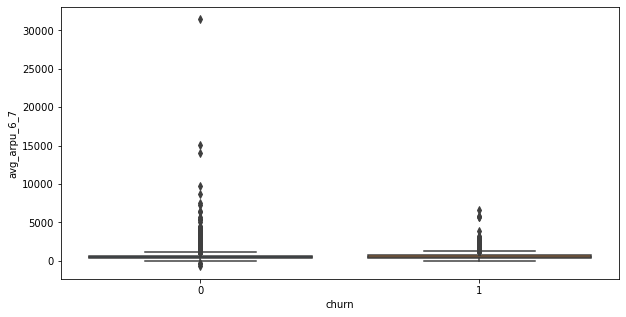

In [50]:
#plot the boxplot between churn and average arpu of 6th and 7th months
plt.figure(figsize=(10, 5))
sns.boxplot(x = 'churn', y = 'avg_arpu_6_7', data = data)

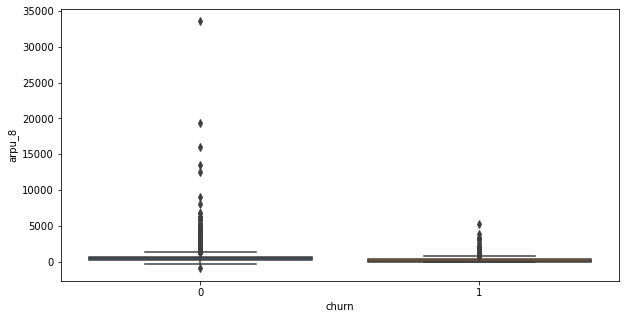

In [51]:
#plot the boxplot between churn and average arpu of 8th months
plt.figure(figsize=(10, 5))
sns.boxplot(x = 'churn', y = 'arpu_8', data = data)

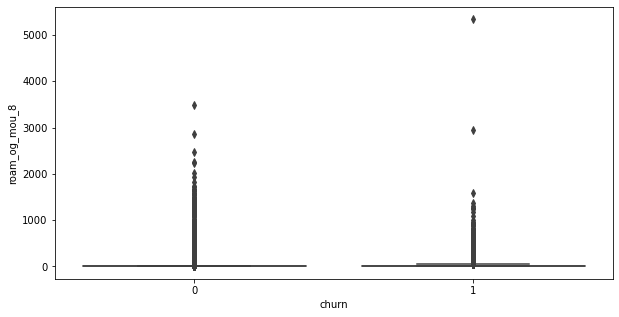

In [52]:
#plot the boxplot between churn and roam_og_mou_8
plt.figure(figsize=(10, 5))
sns.boxplot(x = 'churn', y = 'roam_og_mou_8', data = data)

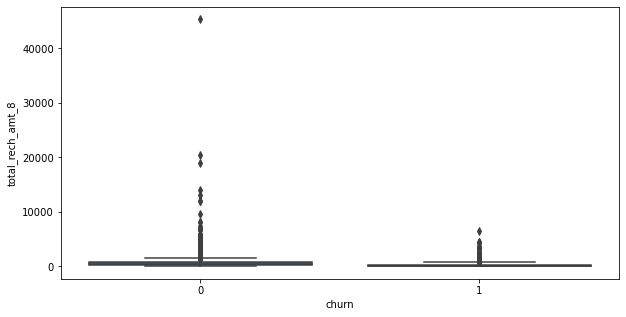

In [53]:
#plot the boxplot between churn and total_rech_amt_8
plt.figure(figsize=(10, 5))
sns.boxplot(x = 'churn', y = 'total_rech_amt_8', data = data)

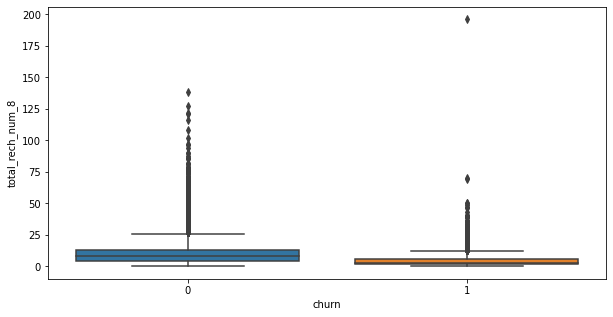

In [54]:
#plot the boxplot between churn and total_rech_num_8
plt.figure(figsize=(10, 5))
sns.boxplot(x = 'churn', y = 'total_rech_num_8', data = data)

In [55]:
# collect all the variables of 8th month
columns_8 = data.filter(regex='8$')
columns_8

arpu_8  onnet_mou_8  offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  \
0       213.803         0.00          0.00           0.00           0.00   
1      3171.480        52.29        325.91          31.64          38.06   
2       137.362        35.08        136.48           0.00           0.00   
3       637.760        85.14        983.39           0.00           0.00   
4       366.966        33.58        205.89           0.00           0.00   
...         ...          ...           ...            ...            ...   
29996   393.474       103.24         61.44           0.00           0.00   
29997   118.707         5.71         18.26           0.00           0.00   
29998   564.334       775.41        595.44           0.00           0.00   
29999   402.080         2.46        248.33           0.00           0.00   
30000   606.817         0.00          0.00           0.00           0.00   

       loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  \
0                  0.00              0.00              0.00              0.00   
1                 40.28            162.28             53.23              0.00   
2                 12.49             50.54              0.00              7.15   
3                 23.34            104.81              1.58              0.00   
4                 33.58            148.56              0.00             17.71   
...                 ...               ...               ...               ...   
29996             89.23             55.59              5.76              0.00   
29997              5.71             10.98              0.00              7.28   
29998            718.56            493.48             13.01              9.15   
29999              2.46            128.01              0.00              0.01   
30000              0.00              0.00              0.00              0.00   

       loc_og_mou_8  ...  vol_2g_mb_8  vol_3g_mb_8  arpu_3g_8  arpu_2g_8  \
0              0.00  ...         5.75       109.61     212.17     212.17   
1            255.79  ...         0.00         0.00       0.00       0.00   
2             63.04  ...         0.03        11.94      19.83       0.00   
3            129.74  ...         0.00         0.00       0.00       0.00   
4            182.14  ...         0.01      1009.92     197.27     150.67   
...             ...  ...          ...          ...        ...        ...   
29996        150.59  ...       112.07      1012.70     212.20     212.17   
29997         16.69  ...       202.22         0.00       0.00       6.23   
29998       1225.06  ...         6.47       926.78       0.05       0.00   
29999        130.48  ...         0.79       678.74       5.44       0.00   
30000          0.00  ...       136.47      2683.30     602.68     602.68   

       night_pck_user_8  monthly_2g_8  sachet_2g_8  monthly_3g_8  sachet_3g_8  \
0                   0.0             0            0             1            0   
1                   0.0             0            0             0            0   
2                   0.0             0            3             0            0   
3                   0.0             0            0             0            0   
4                   0.0             0            0             1            1   
...                 ...           ...          ...           ...          ...   
29996               0.0             0            0             1            0   
29997               0.0             0            5             0            0   
29998               0.0             0            1             0            0   
29999               0.0             1            0             0            0   
30000               0.0             0            0             4            0   

       fb_user_8  
0            1.0  
1            0.0  
2            1.0  
3            0.0  
4            1.0  
...          ...  
29996        1.0  
29997        1.0  
29998        1.0  
29999        1.0  
30000        1.0  

[30001 r

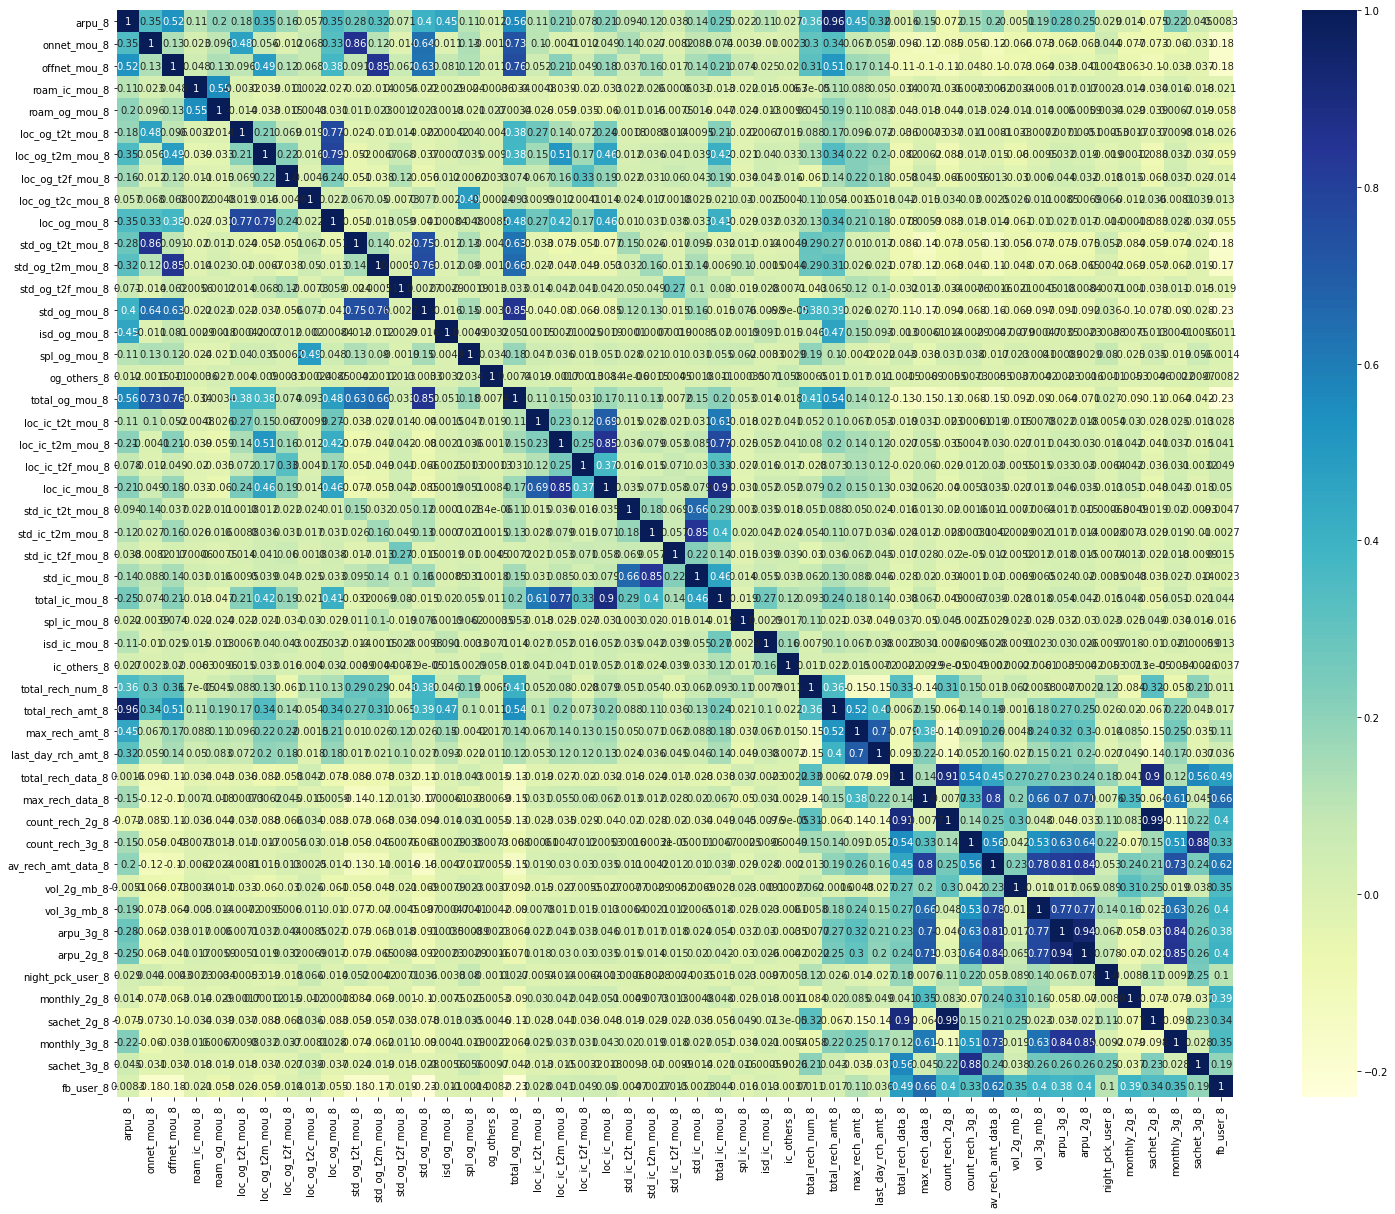

In [56]:
#let check the correlation of all the variables of 8th month
plt.figure(figsize = (25, 20))
sns.heatmap(columns_8.corr(), annot = True, cmap="YlGnBu")
plt.show()

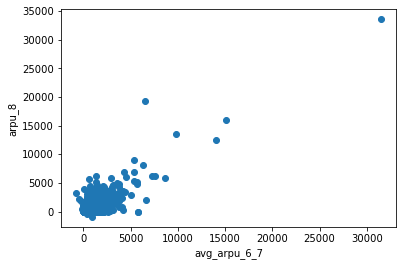

In [57]:
##Plot a scatter-plot between avg_arpu_6_7 and arpu_8
plt.scatter(data.avg_arpu_6_7, data.arpu_8)
plt.xlabel("avg_arpu_6_7")
plt.ylabel("arpu_8")
plt.show()

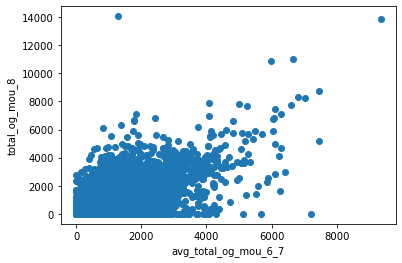

In [58]:
##Plot a scatter-plot between avg_arpu_6_7 and arpu_8
plt.scatter(data.avg_total_og_mou_6_7, data.total_og_mou_8)
plt.xlabel("avg_total_og_mou_6_7")
plt.ylabel("total_og_mou_8")
plt.show()

## Test-Train Split

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
# Putting feature variable to X
X = data.drop(['churn'], axis=1)
X.head()

arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   213.803         0.00         0.00         0.00          0.00   
1  3171.480        57.84        54.68        52.29        453.43   
2   137.362       413.69       351.03        35.08         94.66   
3   637.760       102.41       132.11        85.14        757.93   
4   366.966        48.96        50.66        33.58         85.41   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  loc_og_t2t_mou_6  \
0          0.00          0.00           0.00           0.00              0.00   
1        567.16        325.91          31.64          38.06             51.39   
2         80.63        136.48           0.00           0.00            297.13   
3        896.68        983.39           0.00           0.00              4.48   
4         89.36        205.89           0.00           0.00             48.96   

   ...  avg_isd_og_mou_6_7  avg_total_og_mou_6_7  avg_loc_ic_mou_6_7  \
0  ...               0.000                 0.000               0.000   
1  ...               0.090               548.385             391.555   
2  ...               0.000               470.010              52.630   
3  ...               0.000               944.565             106.505   
4  ...               0.005               137.210             145.520   

   avg_std_ic_mou_6_7  avg_total_ic_mou_6_7  avg_total_rech_num_6_7  \
0               0.000                 0.000                     3.5   
1             176.810               592.250                     5.0   
2              13.545                66.175                    20.0   
3              62.985               169.490                    24.0   
4               8.915               171.235                     4.0   

   avg_total_rech_amt_6_7  avg_total_rech_data_6_7  avg_vol_2g_mb_6_7  \
0                   307.0                      1.0             15.725   
1                  1185.0                      0.0              0.000   
2                   519.0                      1.0            178.000   
3                   640.0                      0.0              0.000   
4                   227.0                      1.0              0.240   

   avg_vol_3g_mb_6_7  
0            117.165  
1              0.000  
2            375.475  
3              0.000  
4            299.545  

[5 rows x 136 columns]

In [61]:
X.shape

(30001, 136)

### scaling the X features 

In [62]:
# scaling the X features 
cols = X.columns
scaler = MinMaxScaler()
X[cols] = scaler.fit_transform(X[cols])

In [63]:
X.head()

arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0  0.033622     0.000000     0.000000     0.000000      0.000000   
1  0.119378     0.007841     0.006703     0.004863      0.054223   
2  0.031406     0.056081     0.043030     0.003262      0.011320   
3  0.045915     0.013883     0.016194     0.007918      0.090636   
4  0.038063     0.006637     0.006210     0.003123      0.010214   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  loc_og_t2t_mou_6  \
0      0.000000      0.000000       0.000000       0.000000          0.000000   
1      0.058669      0.023267       0.007588       0.007131          0.007991   
2      0.008341      0.009743       0.000000       0.000000          0.046200   
3      0.092756      0.070205       0.000000       0.000000          0.000697   
4      0.009244      0.014699       0.000000       0.000000          0.007613   

   ...  avg_isd_og_mou_6_7  avg_total_og_mou_6_7  avg_loc_ic_mou_6_7  \
0  ...        0.000000e+00              0.000000            0.000000   
1  ...        1.580203e-05              0.058668            0.059719   
2  ...        0.000000e+00              0.050283            0.008027   
3  ...        0.000000e+00              0.101053            0.016244   
4  ...        8.778907e-07              0.014679            0.022194   

   avg_std_ic_mou_6_7  avg_total_ic_mou_6_7  avg_total_rech_num_6_7  \
0            0.000000              0.000000                0.019355   
1            0.031403              0.078138                0.029032   
2            0.002406              0.008731                0.125806   
3            0.011187              0.022362                0.151613   
4            0.001583              0.022592                0.022581   

   avg_total_rech_amt_6_7  avg_total_rech_data_6_7  avg_vol_2g_mb_6_7  \
0                0.008130                 0.018349           0.001981   
1                0.031380                 0.000000           0.000000   
2                0.013744                 0.018349           0.022421   
3                0.016948                 0.000000           0.000000   
4                0.006011                 0.018349           0.000030   

   avg_vol_3g_mb_6_7  
0           0.003195  
1           0.000000  
2           0.010240  
3           0.000000  
4           0.008169  

[5 rows x 136 columns]

In [64]:
# Putting response variable to y
y = data['churn']
y.head()

0    1
1    1
2    0
3    0
4    0
Name: churn, dtype: int64

In [65]:
y.shape

(30001,)

In [66]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## PCA on data

In [67]:

from sklearn.decomposition import PCA

In [68]:
X_train.shape

(21000, 136)

In [69]:
pca = PCA(random_state=150)

In [70]:
pca.fit(X_train)

PCA(random_state=150)

In [71]:
# Components from the PCA
pca.components_

array([[-1.77581929e-03, -2.43627111e-02, -2.28604688e-02, ...,
         3.36821413e-02,  1.80274893e-02,  1.21005845e-02],
       [ 8.24438204e-03,  8.19186651e-03,  1.30310457e-02, ...,
        -1.13671084e-02, -9.52321473e-03, -2.83756638e-03],
       [ 5.19103386e-03,  8.88275322e-03,  5.74759204e-03, ...,
        -1.11280966e-02, -6.73661439e-03, -6.01683975e-04],
       ...,
       [-0.00000000e+00, -4.72462313e-16, -8.26932404e-17, ...,
        -4.56346255e-01, -1.41514160e-17, -2.15156328e-16],
       [-0.00000000e+00, -9.77426536e-16, -5.34273904e-16, ...,
        -2.64417999e-02, -2.68538401e-17,  1.07105853e-16],
       [ 0.00000000e+00, -1.47596490e-14, -1.56799797e-14, ...,
         4.43671106e-01,  2.50339900e-16,  7.11697394e-15]])

In [72]:
# Looking at the explained variance ratio for each component
pca.explained_variance_ratio_

array([5.76824804e-01, 9.24442860e-02, 6.86560781e-02, 5.29966632e-02,
       2.55857735e-02, 2.18766322e-02, 1.89990319e-02, 1.70156939e-02,
       1.68896728e-02, 9.65746510e-03, 8.17463136e-03, 7.38920489e-03,
       6.52954572e-03, 4.89968150e-03, 4.64750568e-03, 4.34228745e-03,
       3.79092047e-03, 3.61965309e-03, 3.32069482e-03, 3.02538888e-03,
       2.59113853e-03, 2.52563084e-03, 2.45812506e-03, 2.31651185e-03,
       2.07761160e-03, 2.07166622e-03, 2.00637027e-03, 1.79829246e-03,
       1.63905157e-03, 1.53881071e-03, 1.48496686e-03, 1.30586035e-03,
       1.26097541e-03, 1.23122469e-03, 1.21351439e-03, 1.17416818e-03,
       1.11628827e-03, 1.02639514e-03, 9.63064707e-04, 7.73906651e-04,
       7.39126447e-04, 6.88297634e-04, 6.59586145e-04, 6.21983851e-04,
       6.06775255e-04, 5.68000673e-04, 5.54305489e-04, 5.31800155e-04,
       5.02915288e-04, 4.87416206e-04, 4.74439305e-04, 4.59866086e-04,
       4.33518286e-04, 4.19931038e-04, 4.11913253e-04, 3.94569278e-04,
      

In [73]:
# Making a scree plot for the explained variance
var_cumu = np.cumsum(pca.explained_variance_ratio_)

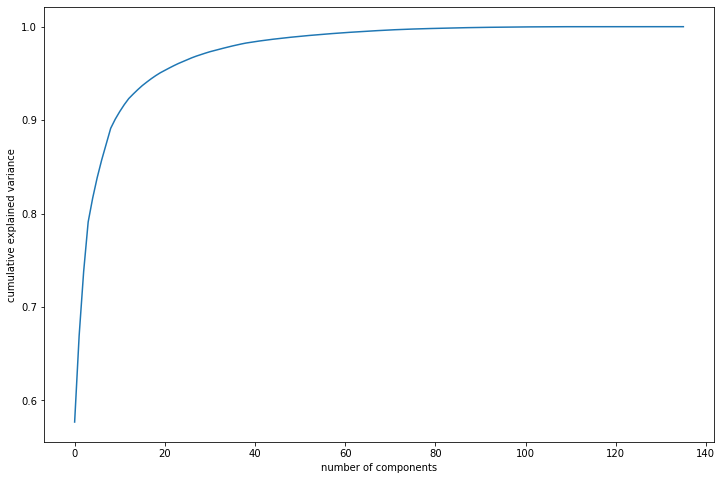

In [74]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#### Lets Perform PCA with 30 components

In [75]:
from sklearn.decomposition import IncrementalPCA

In [76]:
pca_final = IncrementalPCA(n_components=30)

In [77]:
X_train_pca = pca_final.fit_transform(X_train)

In [78]:
X_train_pca.shape

(21000, 30)

In [79]:
corrmat = np.corrcoef(X_train_pca.transpose())

In [80]:
corrmat.shape

(30, 30)

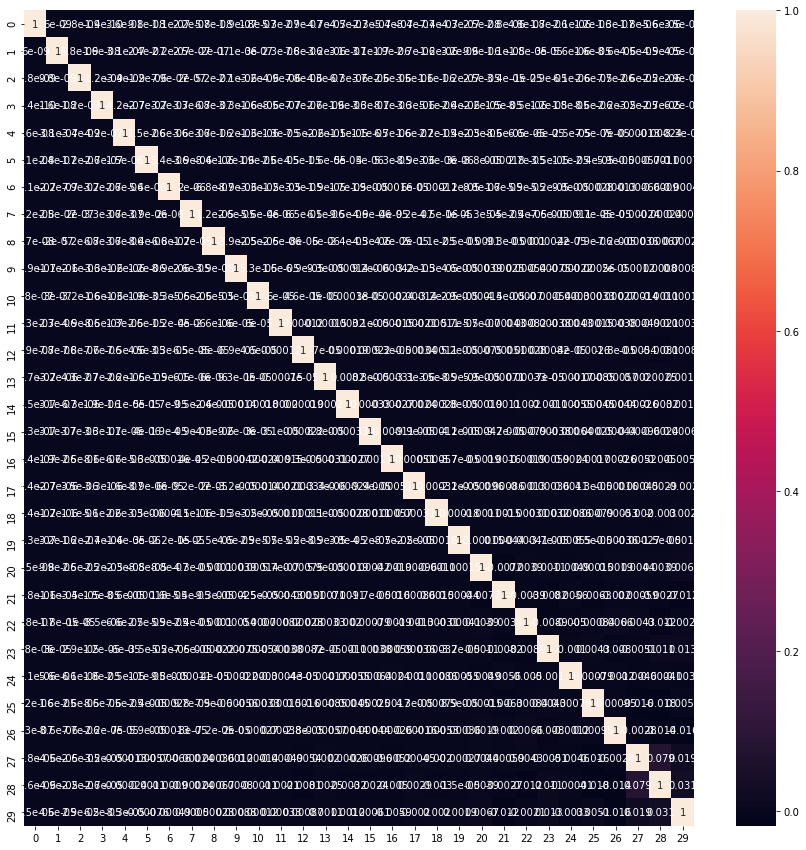

In [81]:
#Plotting the heatmap of the corr matrix
plt.figure(figsize=[15,15])
sns.heatmap(corrmat, annot=True)

In [82]:
# Applying the transformation on the test set
X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(9001, 30)

In [83]:
y_test.shape

(9001,)

### Random forest classifier before handling class imbalance problem

In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

# Train
model = RandomForestClassifier(random_state=42)
model.fit(X_train_pca, y_train)
preds = model.predict(X_test_pca)


Accuracy: 0.9260082213087435
Recall: 0.224
specificity: 0.9898194158283844


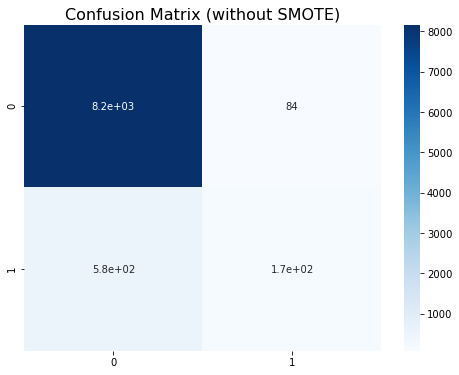

In [85]:
from sklearn import metrics
# Evaluate
# Let's check the overall accuracy.
accuracy = metrics.accuracy_score(y_test, preds)
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (without SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');
TP = cm[1,1] # true positive 
TN = cm[0,0] # true negatives
FP = cm[0,1] # false positives
FN = cm[1,0] # false negatives
# Let's see the sensitivity or recall of our logistic regression model
recall = TP / float(TP+FN)
# Let's see the specificity of our logistic regression model
specificity = TN / float(TN+FP)
print('Accuracy:',accuracy)
print('Recall:',recall)
print('specificity:',specificity)

###### The model is 92% accurate. it can correctly classify almost all genuine transactions. But it also classified  78% of fraud transactions as genuine.

##  Handle class imbalance using SMOTE

In [86]:
# import library
from imblearn.over_sampling import SMOTE


In [87]:
smote = SMOTE()

In [88]:
X_sm, y_sm = smote.fit_resample(X, y)

In [89]:
print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

Shape of X before SMOTE: (30001, 136)
Shape of X after SMOTE: (55120, 136)


In [90]:
print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100


Balance of positive and negative classes (%):


1    50.0
0    50.0
Name: churn, dtype: float64

## Model Building

## Logistic Regression and hyper parameter Tuning

In [91]:
# Splitting the balanced data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_sm,y_sm, train_size=0.7,test_size=0.3,random_state=100)

In [92]:
X_train.shape

(38584, 136)

In [93]:
# Model Building
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [94]:
#Training the model on the train data
log = LogisticRegression(class_weight='balanced')
logmodel = log.fit(X_train,y_train)

In [95]:
# Making prediction on the test data
X_test_pred = logmodel.predict_proba(X_test)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, X_test_pred))

'0.91'

In [96]:
#Making prediction on the test data
pred_test = logmodel.predict_proba(X_test)
y_pred_default = logmodel.predict(X_test)

In [97]:
# print(classification_report(y_test,y_pred_default))
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[6806 1434]
 [1211 7085]]
0.8400459603289792


In [98]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(pred_test)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test,y_pred_1],axis=1)

# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'churn_prob'})

In [99]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds =roc_curve(y_pred_final.churn,y_pred_final.churn_prob)
roc_auc = auc(fpr, tpr)
print('ROC_AUC score: ',roc_auc)

ROC_AUC score:  0.9092176543146305


In [100]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

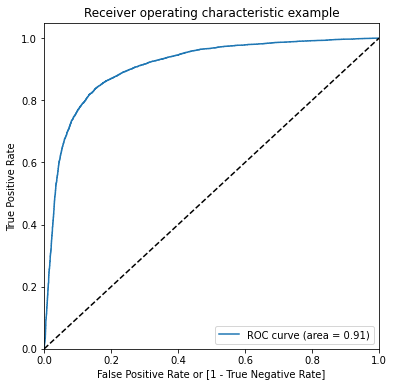

(array([0.00000000e+00, 1.21359223e-04, 1.21359223e-04, ...,
        9.99757282e-01, 9.99878641e-01, 1.00000000e+00]),
 array([0.00000000e+00, 0.00000000e+00, 1.20540019e-04, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]),
 array([1.99913137e+00, 9.99131371e-01, 9.98720667e-01, ...,
        4.18221827e-09, 6.04937728e-10, 1.45635154e-10]))

In [101]:
draw_roc(y_pred_final.churn, y_pred_final.churn_prob)

#### Find optiman cutoff probability. It is the prob where we get balanced sensitivity and specificity

In [102]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.churn_prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

churn  churn_prob  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
0      0    0.022460    1    0    0    0    0    0    0    0    0    0
1      1    0.840657    1    1    1    1    1    1    1    1    1    0
2      1    0.869038    1    1    1    1    1    1    1    1    1    0
3      1    0.855958    1    1    1    1    1    1    1    1    1    0
4      1    0.962038    1    1    1    1    1    1    1    1    1    1

In [103]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.501693  0.000000  1.000000
0.1   0.1  0.672654  0.362257  0.980955
0.2   0.2  0.749153  0.532646  0.964200
0.3   0.3  0.794025  0.655825  0.931292
0.4   0.4  0.823899  0.751335  0.895974
0.5   0.5  0.840046  0.825971  0.854026
0.6   0.6  0.837385  0.883617  0.791466
0.7   0.7  0.822448  0.921723  0.723843
0.8   0.8  0.782112  0.952549  0.612825
0.9   0.9  0.591437  0.988228  0.197324


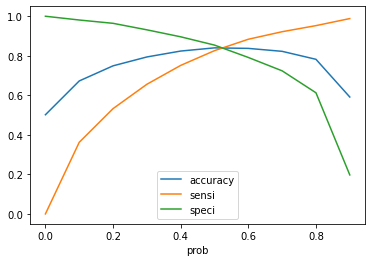

In [104]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

##### From the curve above, 0.5 is the optimum point to take it as a cutoff probability.

In [105]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final['pred_churn'] = y_pred_final.churn_prob.map( lambda x: 1 if x > 0.5 else 0)

y_pred_final.churn.value_counts()

1    8296
0    8240
Name: churn, dtype: int64

In [106]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.churn, y_pred_final.pred_churn )
confusion

array([[6806, 1434],
       [1211, 7085]], dtype=int64)

In [107]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [108]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8540260366441659

In [109]:
# Let us calculate specificity
TN / float(TN+FP)

0.8259708737864078

In [110]:
print('Accuracy Score on test data: ', accuracy_score(y_test,y_pred_default))

Accuracy Score on test data:  0.8400459603289792


In [111]:
# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

positive predictive value:  0.8316703838478695


In [112]:
# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

Negative predictive value:  0.8489459897717351


In [113]:
## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Misclassification Rate:  0.15995403967102081


In [114]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

#### Get feature importance

Feature: 0, Score: -0.51339
Feature: 1, Score: 0.16449
Feature: 2, Score: 1.78310
Feature: 3, Score: -2.29327
Feature: 4, Score: -0.17277
Feature: 5, Score: 2.92782
Feature: 6, Score: -4.14108
Feature: 7, Score: 0.91078
Feature: 8, Score: 2.74059
Feature: 9, Score: 0.54318
Feature: 10, Score: -0.04662
Feature: 11, Score: -2.10804
Feature: 12, Score: -1.10620
Feature: 13, Score: 0.92363
Feature: 14, Score: -6.32428
Feature: 15, Score: -0.33050
Feature: 16, Score: -1.05229
Feature: 17, Score: -2.60939
Feature: 18, Score: -2.96450
Feature: 19, Score: 1.18199
Feature: 20, Score: 0.97431
Feature: 21, Score: -5.11545
Feature: 22, Score: 0.58673
Feature: 23, Score: 0.41849
Feature: 24, Score: -1.46174
Feature: 25, Score: 0.11879
Feature: 26, Score: 1.23692
Feature: 27, Score: -2.09705
Feature: 28, Score: -0.17474
Feature: 29, Score: -0.77720
Feature: 30, Score: -2.10499
Feature: 31, Score: -3.00856
Feature: 32, Score: 0.62141
Feature: 33, Score: -0.63620
Feature: 34, Score: -0.25174
Feature: 

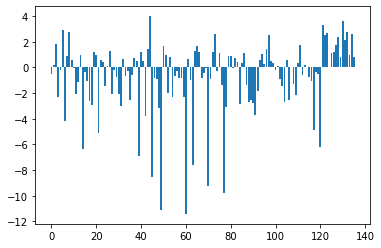

In [115]:
# get importance
importance = logmodel.coef_[0]
#summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
#plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

### Logistic Regression metrics:
##### sensitivity = 0.83
##### specificity = 0.84
##### positive predictive value:  0.84
##### Negative predictive value:  0.83
##### Misclassification Rate:  0.16

## Random forest 

In [116]:
# Train
rf = RandomForestClassifier(n_estimators=10, max_depth=4, max_features=5, random_state=100, oob_score=True)

In [117]:
%%time
rf.fit(X_train, y_train)

Wall time: 422 ms


RandomForestClassifier(max_depth=4, max_features=5, n_estimators=10,
                       oob_score=True, random_state=100)

In [118]:
rf.oob_score_

0.8103358905245698

In [119]:
from sklearn.metrics import plot_roc_curve

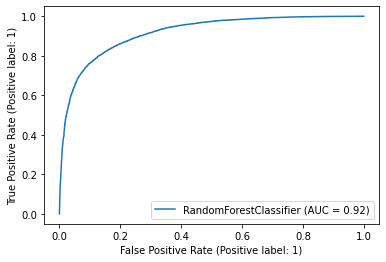

In [120]:
plot_roc_curve(rf, X_train, y_train)
plt.show()

#### Hyper-parameter tuning for Random Forest

In [121]:
# Hyper-parameter tuning for the Random Forest
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [122]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10, 25, 50, 100]
}

In [123]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [124]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 120 candidates, totalling 480 fits
Wall time: 6min 17s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [129]:
grid_search.best_score_

0.941400580551524

In [130]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_jobs=-1,
                       random_state=42)

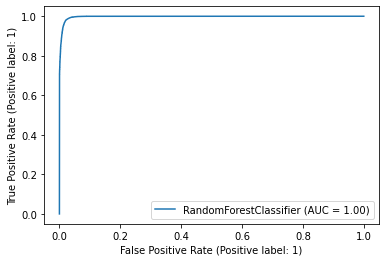

In [131]:
plot_roc_curve(rf_best, X_train, y_train)
plt.show()

#### Feature importance of Random forest

In [132]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

In [133]:
imp_df.sort_values(by="Imp", ascending=False).head(10)

Varname       Imp
60      total_ic_mou_8  0.062334
8        roam_og_mou_8  0.059136
45    loc_ic_t2m_mou_8  0.049799
7        roam_ic_mou_8  0.046038
49        loc_ic_mou_8  0.045776
0               arpu_8  0.044617
71    total_rech_amt_8  0.037299
77  last_day_rch_amt_8  0.034109
42    loc_ic_t2t_mou_8  0.031014
74      max_rech_amt_8  0.029728

In [134]:
preds = rf_best.predict(X_test)

Sensitivity:  0.9564850530376084
Specificity:  0.9433252427184466
false postive rate:  0.0566747572815534
positive predictive value:  0.9444179957153058
Negative predictive value:  0.9556183919350872
Misclassification Rate:  0.050072568940493466


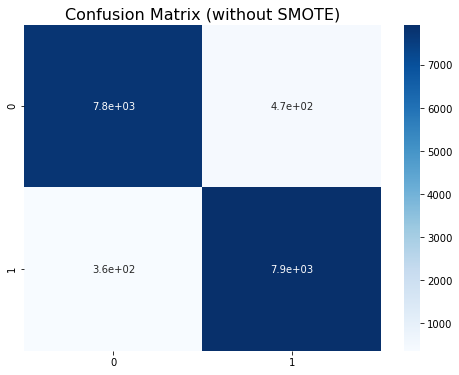

In [135]:
# Evaluate
# Let's check the overall accuracy.
accuracy = metrics.accuracy_score(y_test, preds)
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (without SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');
TP = cm[1,1] # true positive 
TN = cm[0,0] # true negatives
FP = cm[0,1] # false positives
FN = cm[1,0] # false negatives

print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

### Random Forest Classifier Metrics:
##### Sensitivity:  0.95
##### Specificity:  0.94
##### False postive rate:  0.058
##### Positive predictive value:  0.94
##### Negative predictive value:  0.95
##### Misclassification Rate:  0.053

## Decision Tree Classifier 

In [136]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier


In [137]:
#Fitting the decision tree with default hyperparameters
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [138]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

In [139]:
evaluate_model(dt)

Train Accuracy : 1.0
Train Confusion Matrix:
[[19320     0]
 [    0 19264]]
--------------------------------------------------
Test Accuracy : 0.9127963231736816
Test Confusion Matrix:
[[7432  808]
 [ 634 7662]]


#### Hyper-parameter tuning

In [140]:
dt = DecisionTreeClassifier(random_state=42)

In [141]:
from sklearn.model_selection import GridSearchCV

In [142]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [143]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [144]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits
Wall time: 1min 16s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [145]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.800840      0.071996         0.014712        0.003758   
1       0.852967      0.070720         0.017953        0.004172   
2       0.719574      0.016962         0.012966        0.002545   
3       0.757223      0.026969         0.012966        0.000705   
4       0.774676      0.080820         0.018201        0.007737   

  param_criterion param_max_depth param_min_samples_leaf  \
0            gini               2                      5   
1            gini               2                     10   
2            gini               2                     20   
3            gini               2                     50   
4            gini               2                    100   

                                              params  split0_test_score  \
0  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.826146   
1  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.826146   
2  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.826146   
3  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.826146   
4  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.826146   

   split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
0            0.82345           0.814742           0.812046         0.819096   
1            0.82345           0.814742           0.812046         0.819096   
2            0.82345           0.814742           0.812046         0.819096   
3            0.82345           0.814742           0.812046         0.819096   
4            0.82345           0.814742           0.812046         0.819096   

   std_test_score  rank_test_score  
0        0.005859               41  
1        0.005859               41  
2        0.005859               41  
3        0.005859               41  
4        0.005859               41

In [146]:
score_df.nlargest(5,"mean_test_score")

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
15       3.305179      0.035403         0.015874        0.000720   
20       6.572845      0.485970         0.012151        0.005548   
16       3.227946      0.010865         0.015458        0.001653   
46       6.306418      0.179840         0.015456        0.000286   
47       5.860548      0.226980         0.014419        0.001722   

   param_criterion param_max_depth param_min_samples_leaf  \
15            gini              10                      5   
20            gini              20                      5   
16            gini              10                     10   
46         entropy              20                     10   
47         entropy              20                     20   

                                               params  split0_test_score  \
15  {'criterion': 'gini', 'max_depth': 10, 'min_sa...           0.899026   
20  {'criterion': 'gini', 'max_depth': 20, 'min_sa...           0.897056   
16  {'criterion': 'gini', 'max_depth': 10, 'min_sa...           0.897263   
46  {'criterion': 'entropy', 'max_depth': 20, 'min...           0.892183   
47  {'criterion': 'entropy', 'max_depth': 20, 'min...           0.895190   

    split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
15           0.902447           0.904935           0.898196         0.901151   
20           0.899129           0.899751           0.898922         0.898714   
16           0.899959           0.899544           0.894257         0.897756   
46           0.893324           0.900684           0.896123         0.895578   
47           0.896330           0.897056           0.893738         0.895578   

    std_test_score  rank_test_score  
15        0.002704                1  
20        0.001005                2  
16        0.002266                3  
46        0.003278                4  
47        0.001253                4

In [147]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=42)

In [148]:
dt_best = grid_search.best_estimator_

In [149]:
evaluate_model(dt_best)

Train Accuracy : 0.9397936968691686
Train Confusion Matrix:
[[17923  1397]
 [  926 18338]]
--------------------------------------------------
Test Accuracy : 0.9114658925979681
Test Confusion Matrix:
[[7386  854]
 [ 610 7686]]


In [150]:
#Test Metrics
TP = 7712 # true positive 
TN = 7285 # true negatives
FP = 955 # false positives
FN = 584 # false negatives

print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Sensitivity:  0.9296046287367405
Specificity:  0.8841019417475728
false postive rate:  0.11589805825242719
positive predictive value:  0.8898119303103726
Negative predictive value:  0.9257847248697421
Misclassification Rate:  0.09306966618287373


In [151]:
from sklearn.metrics import classification_report

In [152]:
print(classification_report(y_test, dt_best.predict(X_test)))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      8240
           1       0.90      0.93      0.91      8296

    accuracy                           0.91     16536
   macro avg       0.91      0.91      0.91     16536
weighted avg       0.91      0.91      0.91     16536



In [153]:
# Importing required packages for visualization
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

In [154]:
def get_dt_graph(dt_classifier):
    dot_data = StringIO()
    export_graphviz(dt_classifier, out_file=dot_data, filled=True,rounded=True,
                    feature_names=X.columns, 
                    class_names=['churn', "Not churn"])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.588224 to fit



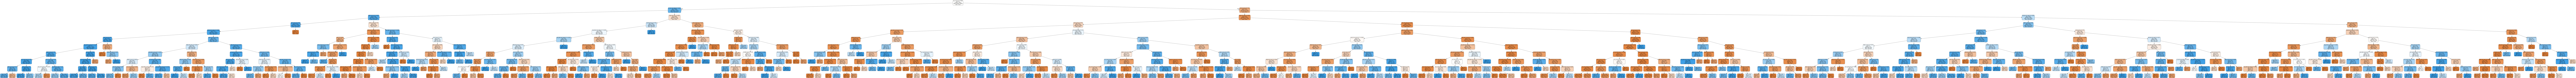

In [155]:
gph = get_dt_graph(dt_best)
Image(gph.create_png())

##### Feature importance in Decision Tree classification

In [156]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": dt_best.feature_importances_})

In [157]:
imp_df.sort_values(by="Imp", ascending=False).head(10)

Varname       Imp
49        loc_ic_mou_8  0.400550
8        roam_og_mou_8  0.137762
90  av_rech_amt_data_8  0.056894
77  last_day_rch_amt_8  0.046037
39      total_og_mou_8  0.030093
60      total_ic_mou_8  0.026634
70    total_rech_num_8  0.025263
71    total_rech_amt_8  0.024316
34        spl_og_mou_7  0.018344
7        roam_ic_mou_8  0.016812

### Summary

#### Logistic Regression metrics:
sensitivity = 0.83
specificity = 0.84
positive predictive value: 0.84
Negative predictive value: 0.83
Misclassification Rate: 0.16

#### Random Forest Classifier metrics:
 Sensitivity:  0.95
Specificity:  0.94
 False postive rate:  0.058
Positive predictive value:  0.94
 Negative predictive value:  0.95
 Misclassification Rate:  0.053

#### Decision Tree Classification metrics:
Sensitivity:  0.929
Specificity:  0.88
false postive rate:  0.115
positive predictive value:  0.889
Negative predictive value:  0.92
Misclassification Rate:  0.093

## Recomendation for Model Selection
Random Forest and Decision tree performed better than Logistic Regression for customer churn analysis for this particular dataset, using PCA.

Random Forest is the best model 95.2 % Sensitivity and 0.053% Misclassification Rate. 

#### Identifying important churn indicators and business recommendation

## Important features of Random Forest classifier are: 
total_ic_mou_8,    roam_og_mou_8,   loc_ic_t2m_mou_8,    loc_ic_mou_8,   roam_ic_mou_8,   arpu_8,    total_rech_amt_8, last_day_rch_amt_8,    loc_ic_t2t_mou_8,    max_rech_amt_8

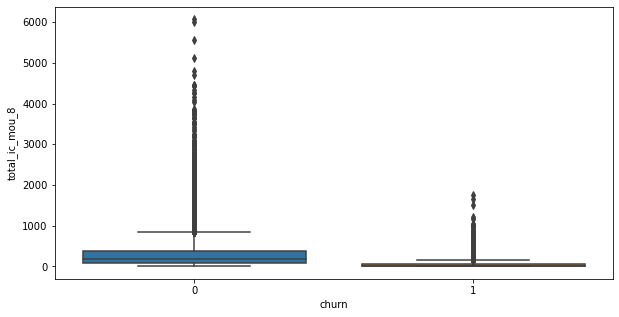

In [158]:
#plot the boxplot between churn and total_ic_mou_8
plt.figure(figsize=(10, 5))
sns.boxplot(x = 'churn', y = 'total_ic_mou_8', data = data)

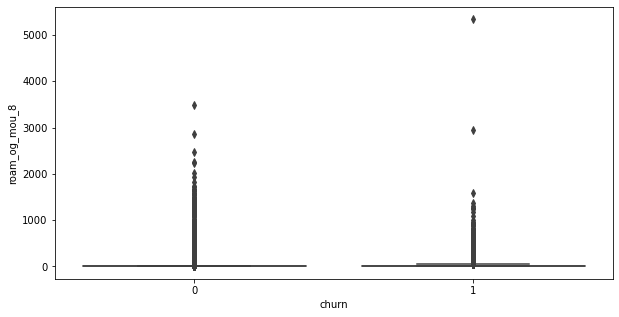

In [159]:
#plot the boxplot between churn and roam_og_mou_8
plt.figure(figsize=(10, 5))
sns.boxplot(x = 'churn', y = 'roam_og_mou_8', data = data)

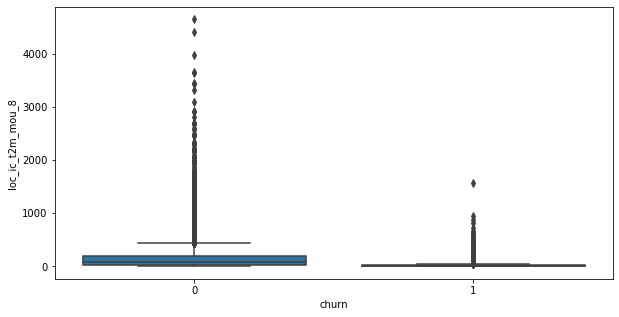

In [160]:
#plot the boxplot between churn and loc_ic_t2m_mou_8
plt.figure(figsize=(10, 5))
sns.boxplot(x = 'churn', y = 'loc_ic_t2m_mou_8', data = data)

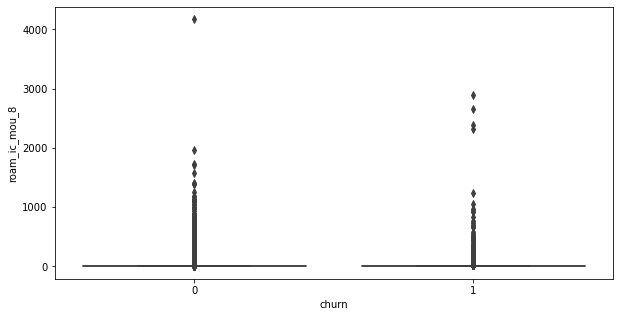

In [161]:
#plot the boxplot between churn and roam_ic_mou_8
plt.figure(figsize=(10, 5))
sns.boxplot(x = 'churn', y = 'roam_ic_mou_8', data = data)

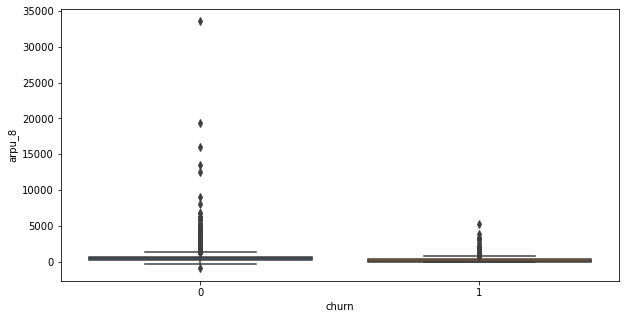

In [162]:
#plot the boxplot between churn and arpu_8
plt.figure(figsize=(10, 5))
sns.boxplot(x = 'churn', y = 'arpu_8', data = data)

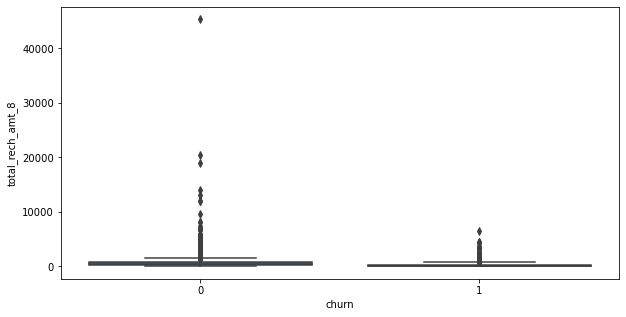

In [163]:
#plot the boxplot between churn and total_rech_amt_8
plt.figure(figsize=(10, 5))
sns.boxplot(x = 'churn', y = 'total_rech_amt_8', data = data)

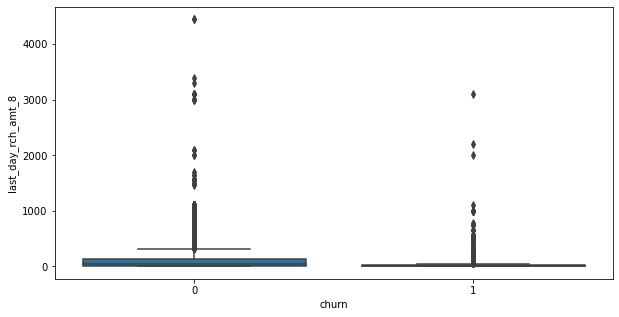

In [164]:
#plot the boxplot between churn and tlast_day_rch_amt_8
plt.figure(figsize=(10, 5))
sns.boxplot(x = 'churn', y = 'last_day_rch_amt_8', data = data)

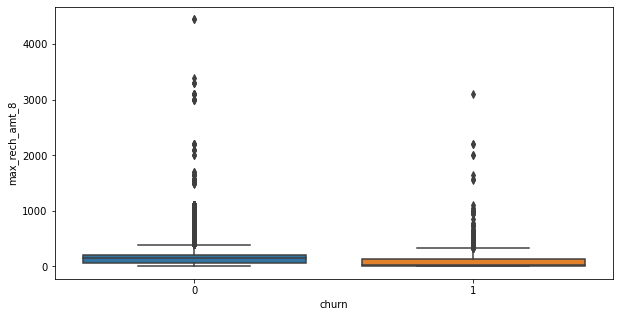

In [165]:
#plot the boxplot between churn and max_rech_amt_8
plt.figure(figsize=(10, 5))
sns.boxplot(x = 'churn', y = 'max_rech_amt_8', data = data)

## Business Insights
-> roam_ic_mou_8 - Higher the incoming roaming amount, higher is the churn rate. Focus on customers whose incoming roaming amount has increased, because they are likely to churn.

-> max_rech_amt_8- Focus on the customer whoes Avg max recharge amount has been decreased

-> last_day_rch_amt_8 - Focus on the customer whoes last day recharge amount is less.

-> concentrate on the customers whose total_rech_amt_8 amount is less than 500

-> customers whose arpu-8 is less than 5000 has high chance of churn
